In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
def f(x):
    return x**3 - 9*x + 3

In [7]:
f(0)

3

In [8]:
f(-4)

-25

In [9]:
f(-3)

3

In [10]:
np.arange(-5, 4)

array([-5, -4, -3, -2, -1,  0,  1,  2,  3])

In [11]:
valores_inteiros = np.arange(-5, 4+1)

In [12]:
f(valores_inteiros)

array([-77, -25,   3,  13,  11,   3,  -5,  -7,   3,  31])

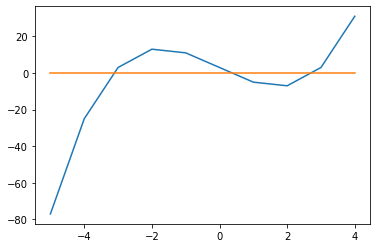

In [13]:
plt.plot(valores_inteiros, f(valores_inteiros))
plt.plot(valores_inteiros, np.zeros(len(valores_inteiros)))

In [14]:
np.linspace(-5, 4, 20)

array([-5.        , -4.52631579, -4.05263158, -3.57894737, -3.10526316,
       -2.63157895, -2.15789474, -1.68421053, -1.21052632, -0.73684211,
       -0.26315789,  0.21052632,  0.68421053,  1.15789474,  1.63157895,
        2.10526316,  2.57894737,  3.05263158,  3.52631579,  4.        ])

In [15]:
valores_igualmente_espacados = np.linspace(-5, 4, 200)

In [16]:
f(valores_igualmente_espacados)

array([-7.70000000e+01, -7.40456639e+01, -7.11521349e+01, -6.83188579e+01,
       -6.55452778e+01, -6.28308398e+01, -6.01749886e+01, -5.75771693e+01,
       -5.50368269e+01, -5.25534063e+01, -5.01263525e+01, -4.77551104e+01,
       -4.54391250e+01, -4.31778413e+01, -4.09707043e+01, -3.88171588e+01,
       -3.67166500e+01, -3.46686227e+01, -3.26725218e+01, -3.07277925e+01,
       -2.88338796e+01, -2.69902282e+01, -2.51962830e+01, -2.34514893e+01,
       -2.17552918e+01, -2.01071356e+01, -1.85064657e+01, -1.69527269e+01,
       -1.54453644e+01, -1.39838229e+01, -1.25675476e+01, -1.11959833e+01,
       -9.86857509e+00, -8.58476786e+00, -7.34400659e+00, -6.14573626e+00,
       -4.98940182e+00, -3.87444825e+00, -2.80032051e+00, -1.76646356e+00,
       -7.72322383e-01,  1.82658070e-01,  1.09903283e+00,  1.97735692e+00,
        2.81818539e+00,  3.62207327e+00,  4.38957559e+00,  5.12124738e+00,
        5.81764368e+00,  6.47931953e+00,  7.10682995e+00,  7.70072998e+00,
        8.26157466e+00,  

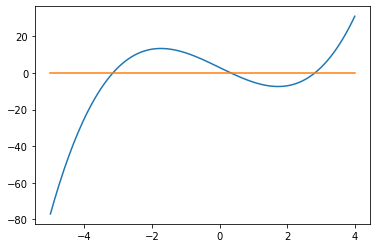

In [17]:
plt.plot(valores_igualmente_espacados, f(valores_igualmente_espacados))
plt.plot(valores_igualmente_espacados, np.zeros(len(valores_igualmente_espacados)))

In [20]:
x = []
y = []

for i in range(-4, 4):
    x.append(i)
    y.append(f(i))

tabela = pd.DataFrame({'x': x, 'f(x)': y})

In [22]:
tabela.set_index('x', inplace=True)

In [23]:
tabela

,f(x)
x,
-4,-25
-3,3
-2,13
-1,11
0,3
1,-5
2,-7
3,3


In [62]:
# supondo que b > a
a = 0
b = 1
x = (b-a)/2 + a

In [63]:
f(a), f(b)

(3, -5)

In [64]:
x, f(x)

(0.5, -1.375)

In [65]:
b = x
x = (b-a)/2 + a

In [66]:
x, f(x)

(0.25, 0.765625)

In [67]:
a = x
x = (b-a)/2 + a

In [68]:
x, f(x)

(0.375, -0.322265625)

In [69]:
b = x
x = (b-a)/2 + a

In [70]:
x, f(x)

(0.3125, 0.218017578125)

In [84]:
CRESCENTE = 'CRESCENTE'
DECRESCENTE = 'DECRESCENTE'

class SolverMetodoBiseccao:
    
    def __init__(self, f, epsilon = 0.001):
        self.f = f
        self.tabela = {'a': [], 'b': [], 'b-a': [], 'x': [], 'f(x)': []}
        self.epsilon = epsilon
        self.crescimento = None
    
    def solve(self, a, b):
        
        self.tabela = {'a': [], 'b': [], 'b-a': [], 'x': [], 'f(x)': []}
        
        if f(a) < f(b):
            self.crescimento = CRESCENTE
        else:
            self.crescimento = DECRESCENTE
        
        self._solve_recursive(a, b)
        return pd.DataFrame(self.tabela)
    
    def _solve_recursive(self, a, b):
        
        x = (b-a)/2 + a
        self.tabela['a'].append(a)
        self.tabela['b'].append(b)
        self.tabela['b-a'].append(b-a)
        self.tabela['x'].append(x)
        self.tabela['f(x)'].append(f(x))
        
        if (b-a) < self.epsilon:
            return (b-a) / 2
        
        if self.crescimento == CRESCENTE:
            if f(x) < 0:
                return self._solve_recursive(x, b)
            else:
                return self._solve_recursive(a, x)
        else:
            if f(x) < 0:
                return self._solve_recursive(a, x)
            else:
                return self._solve_recursive(x, b)
            
                
        
        
        


In [85]:
resolvedor = SolverMetodoBiseccao(f)

In [86]:
resolvedor.solve(0, 1)

,a,b,b-a,x,f(x)
0,0.000000,1.000000,1.000000,0.500000,-1.375000
1,0.000000,0.500000,0.500000,0.250000,0.765625
2,0.250000,0.500000,0.250000,0.375000,-0.322266
3,0.250000,0.375000,0.125000,0.312500,0.218018
4,0.312500,0.375000,0.062500,0.343750,-0.053131
5,0.312500,0.343750,0.031250,0.328125,0.082203
6,0.328125,0.343750,0.015625,0.335938,0.014474
7,0.335938,0.343750,0.007812,0.339844,-0.019344
8,0.335938,0.339844,0.003906,0.337891,-0.002439
9,0.335938,0.337891,0.001953,0.336914,0.006017
